<a href="https://colab.research.google.com/github/rangellupitajoce-maker/Estadistica2026/blob/main/Student_Performance/eii_u1_p_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO U1**
Jocelyn Guadalupe Carreón Rangel

##INTRODUCCIÓN
En este proyecto tome la base de datos Student Screen Time vs. CGPA Analysis 2026, donde vienen datos de 546 estudiantes universitarios de toda la India. La base tiene información sobre los hábitos de los universitarios y como estos influyen en su rendimiento acádemico. Vienen datos como el tiempo en pantalla, horas de videojuegos, horas de sueño, horas de estudio online, horas de estudio offline y promedio general del semestre anterior y del actual.

Yo decidí utilizar las siguientes variables:
* X = horas_estudio_fuera_de_linea
* Y = promedio_general_sem_actual

¿Las horas que un estudiante dedica a estudiar fuera de linea ( offline) realmente influyen en su promedio?

Para contestar eso, hice un modelo de regresión lineal simple para ver si de verdad existe una relación entre estas dos variables y qué tan fuerte es.

##HIPÓTESIS
Las hipótesis son las siguientes:

* **H0:** No hay relación entre las horas de estudio fuera de línea y el promedio.
* **H1:** Sí existe relación entre las horas de estudio fuera de línea y el promedio.

Utilice un nivel de significancia de 0.05

##MARCO TEÓRICO
La regresión lineal simple sirve para analizar la relación entre dos variables: una independiente (X) y una dependiente (Y).
El modelo busca ajustar una línea que explique cómo cambia "Y" cuando cambia "X"

En este caso:
* X = horas_estudio_fuera_de_linea
* Y = promedio_general_sem_actual

Si la pendiente sale positiva, quiere decir que si estudian más horas fuera de lineas (offline), mayor puede ser su promedio.
Si sale negativa, sería lo contrario.

Para que el modelo sea válido o significativo, se deben revisar algunos aspectos como:
* Que haya correlación.
* Que el modelo explique muy bien la variación de la variable dependiente .
* Que los datos sigan una distribución normal.
* Que haya homocedasticidad.




##METODOLOGÍA
Trabajé con  los 546 datos de la base de datos que elegi de kaggle.
Elegí las dos variables que me interesaban.
Después:
* Realice un diagrama de dispersión de los datos
* Cheque si se cumplía la suposición de linealidad
* Calculé el coeficiente de correlación
* Calculé el coeficiente de determinación
* Obtuve la recta de regresión ajustada y la grafique
* Calcule los residuales
* Hice el Test de Shapiro
* Hice el Test de Brausch-Pagan
* Interpole y extrapole datos
* Realice una tabla ANOVA e interprete el resultado.

Para todo esto usé un nivel de confianza del 95%.

##RESULTADOS

In [26]:
import pandas as pd
link= "https://raw.githubusercontent.com/rangellupitajoce-maker/Estadistica2026/refs/heads/main/Student_Performance/Student_Performance_2026.csv"
df=pd.read_csv(link)
df

,id,edad,genero,horas_diarias_pantalla,horas_redes_sociales,horas_estudio_en_linea,horas_videojuegos,horas_sueño,porcentaje_asistencia,horas_estudio_fuera_de_linea,promedio_general_sem_anterior,promedio_general_sem_actual
0,S011,23,Female,6.2,2.5,3.8,1.2,7.1,79,2.6,7.74,7.94
1,S012,24,Female,4.9,2.0,5.1,1.0,8.3,79,2.6,7.72,7.92
2,S013,18,Female,7.9,3.2,2.1,1.6,7.1,68,2.3,6.67,6.87
3,S014,17,Male,10.0,4.0,0.0,2.0,5.9,63,2.1,6.10,6.30
4,S015,23,Female,7.7,3.1,2.3,1.5,6.4,69,2.3,6.77,6.97
...,...,...,...,...,...,...,...,...,...,...,...,...
541,S552,17,Male,4.1,1.6,5.9,0.8,8.2,78,2.6,7.63,7.83
542,S553,24,Female,6.4,2.6,3.6,1.3,7.5,79,2.6,7.74,7.94
543,S554,17,Male,8.3,3.3,1.7,1.7,6.0,58,1.9,5.62,5.82
544,S555,21,Female,9.8,3.9,0.2,2.0,6.3,64,2.2,6.29,6.49


In [27]:
#1. Establecer variables
x= df["horas_estudio_fuera_de_linea"]
y= df["promedio_general_sem_actual"]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             546 non-null    object 
 1   edad                           546 non-null    int64  
 2   genero                         546 non-null    object 
 3   horas_diarias_pantalla         546 non-null    float64
 4   horas_redes_sociales           546 non-null    float64
 5   horas_estudio_en_linea         546 non-null    float64
 6   horas_videojuegos              546 non-null    float64
 7   horas_sueño                    546 non-null    float64
 8   porcentaje_asistencia          546 non-null    int64  
 9   horas_estudio_fuera_de_linea   546 non-null    float64
 10  promedio_general_sem_anterior  546 non-null    float64
 11  promedio_general_sem_actual    546 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5

In [29]:
df.describe()

,edad,horas_diarias_pantalla,horas_redes_sociales,horas_estudio_en_linea,horas_videojuegos,horas_sueño,porcentaje_asistencia,horas_estudio_fuera_de_linea,promedio_general_sem_anterior,promedio_general_sem_actual
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,20.946886,7.109341,2.843773,2.890659,1.422711,6.696886,72.970696,2.446520,7.142344,7.342344
std,2.587713,1.774872,0.712978,1.774872,0.357921,0.947197,11.747772,0.393615,1.176701,1.176701
min,17.000000,4.000000,1.600000,0.000000,0.800000,5.000000,55.000000,1.800000,5.300000,5.500000
25%,19.000000,5.600000,2.200000,1.400000,1.100000,6.000000,63.000000,2.100000,6.100000,6.300000
50%,21.000000,7.200000,2.900000,2.800000,1.400000,6.600000,72.000000,2.400000,7.080000,7.280000
75%,23.000000,8.600000,3.400000,4.400000,1.700000,7.400000,81.000000,2.700000,7.930000,8.130000
max,25.000000,10.000000,4.000000,6.000000,2.000000,8.500000,97.000000,3.300000,9.570000,9.770000


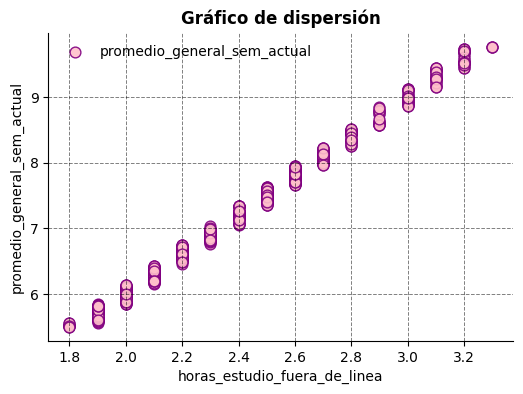

In [30]:
#2. Diagrama de dispersión
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4),  #tamaño (ancho, alto)
    dpi=100         #resolución
)
#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="o",
    color="pink",
    edgecolor="purple", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de punto
    label="promedio_general_sem_actual" #etiqueta
)
#plt.plot(
#   x,y_calculada,
#   marker="o",
# linewidth=2.2,
#  linestyle="--",
# markersize=5,
#markerfacecolor="white",
#markeredgecolor="black",
#label="Promedio_final"

#)

#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "horas_estudio_fuera_de_linea",
    fontsize=10,
)
#Etiqueta eje y
plt.ylabel(
    "promedio_general_sem_actual",
    fontsize=10
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )


3. ¿Los datos soportan la suposición de linealidad?
Si, los datos quieren seguir una linea recta.

In [31]:
#4. Calcula el coeficiente de correlación e interpreta el resultado
from scipy.stats import pearsonr
r, valor_p=pearsonr(x,y) #p es de prueba de hipótesis
                         # Ho: P=0 No hay correlación (el cambio en una variabole está vinculado con el cambio en otra variable)
                         # H1: P\=0 Sí hay correlación
print(f"coeficiente de correlación (r):{r:0.4f}")
print(f"valor_p:{valor_p:0.4f}")


coeficiente de correlación (r):0.9974
valor_p:0.0000


####4. Interpreta el resultado del **coeficiente de correlación**
*   r=0.9974 -> hay correlación.
*   El valor p=0,entoces H0 es falsa, por lo tanto sí hay correlación.
*   La relación es positiva y fuerte.


In [32]:
#5 Calcule el coeficiente de determinación e interprete el resultado. 0= r*r
print(f"coeficiente de determinación:{r**2:0.4f}")

coeficiente de determinación:0.9947


####5. Interprete el resultado del **coeficiente de determinación**   
*   r^2=0.9947
*   El modelo explica a un 99.47% la variación de la variable dependiente.

In [33]:
#6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
y_calculada=modelo.predict(x_constante)
modelo.params

,0
const,0.047801
horas_estudio_fuera_de_linea,2.981599


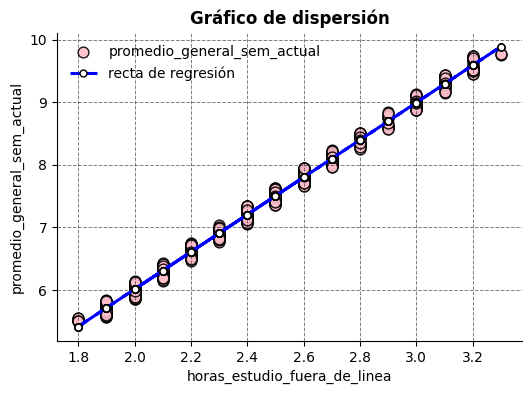

In [34]:
#6. grafíquelo sobre el gráfico de dispersión.

from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4),  #tamaño (ancho, alto)
    dpi=100         #resolución
)
#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="o",
    color="pink",
    edgecolor="black", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de punto
    label="promedio_general_sem_actual" #etiqueta
)

plt.plot(
    x,y_calculada,
    marker="o",
    color="blue",
    linewidth=2.2,
    linestyle="--",
    markersize=5,
    markerfacecolor="white",
    markeredgecolor="black",
    label="recta de regresión"

)

#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "horas_estudio_fuera_de_linea",
    fontsize=10,
)
#Etiqueta eje y
plt.ylabel(
    "promedio_general_sem_actual",
    fontsize=10
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )


In [35]:
#7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
#regresión ajustada ( 𝑏1 )
modelo.conf_int(alpha = 0.05)

,0,1
const,0.002559,0.093043
horas_estudio_fuera_de_linea,2.963342,2.999857


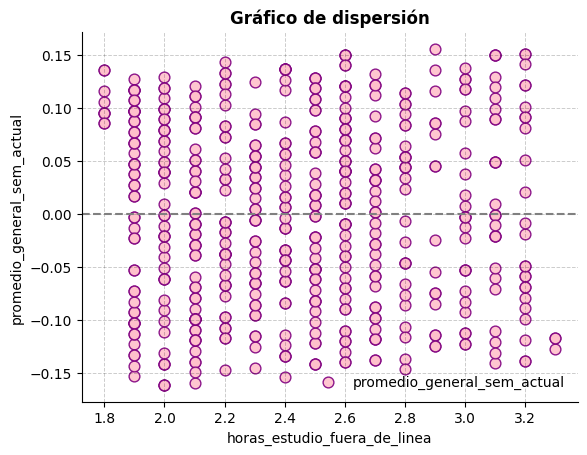

In [36]:
#8.Calcule los residuales y trace un nuevo gráfico de dispersión.
#Comente, ¿Parece que se verifican los supuestos?

residuales=modelo.resid

#Gráfico de dispersión
plt.scatter(
    x,residuales,
    marker="o",
    color="pink",
    edgecolor="purple", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de punto
    label="promedio_general_sem_actual" #etiqueta
)

#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "horas_estudio_fuera_de_linea",
    fontsize=10,
)
#Etiqueta eje y
plt.ylabel(
    "promedio_general_sem_actual",
    fontsize=10
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.2, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )

plt.axhline(y=0, color="gray", linestyle="--") #linea horizontal

#Parece que siguen el supuesto de linealidad


8. Comente, ¿Parece que se verifican los supuestos? Si

In [37]:
#9 Test de Shapiro
from scipy.stats import shapiro
estadistico, valor_p=shapiro(residuales)
print(f"Valor_p: {valor_p:0.4f}")
# Ho: Los datos siguen una distribución normal
# H1: Los datos NO siguen una distribución normal

Valor_p: 0.0000


####9. Comente el resultado del **Test de Shapiro**
*   Como el valor p es mayor al nivel de significacia, 0.0000< 0.05
*   Entonces H0 es falsa
*   Por lo tanto, los datos no siguen una distribución normal.
*   **NOTA:** shapiro es bastante sensible para datos > 30
*   Entoces, para comprobar si los datos de verdad NO siguen una distribución normal, debemos checar el HISTOGRAMA y el Q-Q PLOT


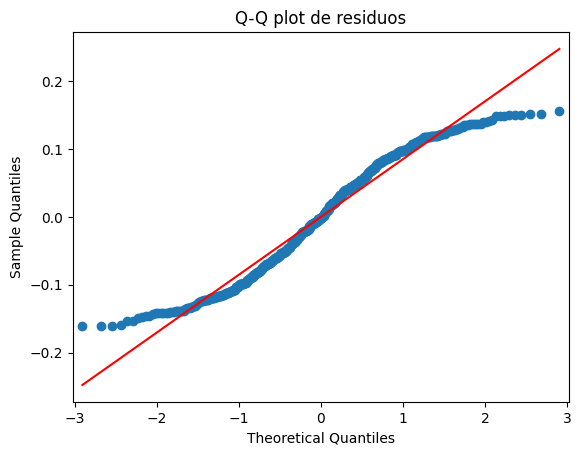

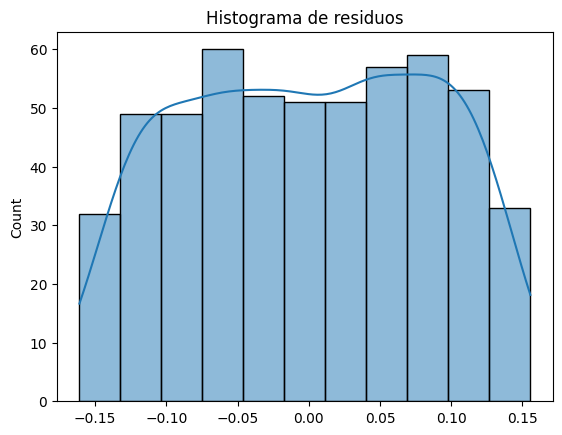

In [38]:
#Histograma y Q-Q plot
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns



# Visualización: Q-Q plot
sm.qqplot(residuales, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuales, kde=True)
plt.title("Histograma de residuos")
plt.show()

####**Q-Q Plot**
*   Como podemos ver los datos siguen la linea roja, tiene unas ligeras curvas en las otillas pero en general si siguen la linea roja.
*   Se puede decir que los datos siguen una distribución normal.
####**Histograma**
*   Tiene una forma muy parecida a una campana y se ve más o menos simétrico
*   Se puede decir que los datos siguen una distribución normal.


In [39]:
#10. Test de Breusch-Pagan
from statsmodels.stats.api import het_breuschpagan
estadistico_1, valor_p_1, estadistico_2, valor_p_2 = het_breuschpagan(residuales, x_constante)
print(f"valor_p:{valor_p_1:0.4f}")
# Ho: No hay heterocedasticidad (varianza uniforme)
# H1: Hay heterocedasticidad (varianza no uniforme)

valor_p:0.3795


####10. Comente el resultado del **Test de Breusch-Pagan**
*   Como el valor p es mayor al nivel de significacia, 0.3795 > 0.05
*   Entonces H0 es verdadera
*   Por lo tanto, No hay heterocedasticidad -> HAY homocedasticidad
*   La varianza es uniforme

In [40]:
#11. Utiliza la recta de regresión para interpolar dos valores y extrapolar uno.
#Comenta estos resultados.
df.describe()

,edad,horas_diarias_pantalla,horas_redes_sociales,horas_estudio_en_linea,horas_videojuegos,horas_sueño,porcentaje_asistencia,horas_estudio_fuera_de_linea,promedio_general_sem_anterior,promedio_general_sem_actual
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,20.946886,7.109341,2.843773,2.890659,1.422711,6.696886,72.970696,2.446520,7.142344,7.342344
std,2.587713,1.774872,0.712978,1.774872,0.357921,0.947197,11.747772,0.393615,1.176701,1.176701
min,17.000000,4.000000,1.600000,0.000000,0.800000,5.000000,55.000000,1.800000,5.300000,5.500000
25%,19.000000,5.600000,2.200000,1.400000,1.100000,6.000000,63.000000,2.100000,6.100000,6.300000
50%,21.000000,7.200000,2.900000,2.800000,1.400000,6.600000,72.000000,2.400000,7.080000,7.280000
75%,23.000000,8.600000,3.400000,4.400000,1.700000,7.400000,81.000000,2.700000,7.930000,8.130000
max,25.000000,10.000000,4.000000,6.000000,2.000000,8.500000,97.000000,3.300000,9.570000,9.770000


In [41]:
#11
modelo.predict([1,2.3])

array([6.90547993])

In [42]:
#11
modelo.predict([1,3.2222])

array([9.65511097])

In [43]:
#11
modelo.predict([1,1.5])

array([4.52020035])

####11. Resultados
*   **Interpolando:**
f(2.3)=6.91, f(3.2222)=9.66
*   **Extrapolando:**
f(4)=4.52







In [44]:
#12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# y ~ x
modelo_lineal=ols("promedio_general_sem_actual~horas_estudio_fuera_de_linea", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
horas_estudio_fuera_de_linea,1.0,750.651820,750.651820,102902.103862,0.0
Residual,544.0,3.968379,0.007295,NaN,NaN


####12. Interprete el resultado de la **Tabla ANOVA**
*   H0: Las variables independientes no explican a la variable dependiente.
*   H1: Sí existe relación entre las variables.
*   El valor p=0
*   Valor p < 0.05
*   H0 es falsa
*   Por lo tanto, sí existe relación entre las variables.
*   El modelo es significativo :)


##CONCLUSIÓN
Al realizar este modelo de regresión lineal simple entre las horas de estudio fuera de línea y el promedio general del semestre actual, se pude concluir lo siguiente:

* Los datos sí cumplen el supuesto de linealidad, pues quieren seguir una linea recta
* El coeficiente de correlación confirmó que sí hay correlación entre las variables, y que la relacioón es positiva y fuerte
* El coeficiente de determinación (R^2 = 99.47%) indicó que el modelo explica al 99.47% la variación del promedio general
* El Test de Shapiro rechazó la normalidad porque es sensible a muestras grande como esta (546 datos). Por eso se tuvi que analizar el histograma y el Q-Q plot y se observó que los residuos sí siguen una distribución aproximadamente normal
* El Test de Breusch-Pagan dice que no hay heterocedasticidad, por lo tanto, la varianza es uniforme (homocedasticidad)
* La prueba ANOVA mostró que el modelo es estadísticamente significativo, confirmando que sí existe relación entre las variables.

En general, se cumplieron los supuestos del modelo (linealidad, normalidad y homocedasticidad), lo que valida el uso de la regresión lineal en este análisis.